In [1]:
import pandas as pd
import spacy
import emoji
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/andy/Documents/DS/TFM SALLE/project/Mostopapi/Mostopapi_videos.csv')
df = df[df['transcript'] != 'Subtitle not available']
df['transcript'] = df['transcript'].str.replace('\xa0__\xa0', 'xxxx')

In [3]:
print(df.isnull().sum())

video_id        0
title           0
description     0
publish_date    0
likes           0
views           0
comments        0
transcript      0
dtype: int64


In [4]:
df['description'] = df['description'].fillna("")

In [5]:
# Load Spanish tokenizer, POS tagger, parser, NER and word vectors
nlp = spacy.load('es_core_news_sm')

def preprocess(text):
    # Lowercase the text
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove emojis
    text = emoji.replace_emoji(text, replace='')

    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize, remove stop words, and lemmatize using SpaCy's Spanish model
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]

    return tokens


In [6]:
%%time

# Apply preprocessing to each column
df['title'] = df['title'].apply(preprocess)
df['description'] = df['description'].apply(preprocess)
df['transcript'] = df['transcript'].apply(preprocess)

CPU times: user 41.8 s, sys: 1.79 s, total: 43.6 s
Wall time: 46.4 s


In [7]:
# Save the DataFrame as CSV
df.to_csv('preprocessed_data.csv', index=False)

In [8]:
# Title
# Word frequency analysis
title_tokens = [token for title in df['title'] for token in title]

# Count the occurrences of each token
word_freq = Counter(title_tokens)

# Display the 10 most common words and their frequencies
most_common_words = word_freq.most_common(15)
print(most_common_words)

# If you prefer the output in a DataFrame
df_word_freq = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
print(df_word_freq)

[('habito', 83), ('joven', 23), ('negro', 10), ('sexual', 10), ('consultorio', 9), ('porno', 7), ('cama', 6), ('video', 5), ('novia', 5), ('hacer', 5), ('cosa', 5), ('racista', 5), ('pene', 4), ('mostopapi', 4), ('blanco', 4)]
           Word  Frequency
0        habito         83
1         joven         23
2         negro         10
3        sexual         10
4   consultorio          9
5         porno          7
6          cama          6
7         video          5
8         novia          5
9         hacer          5
10         cosa          5
11      racista          5
12         pene          4
13    mostopapi          4
14       blanco          4


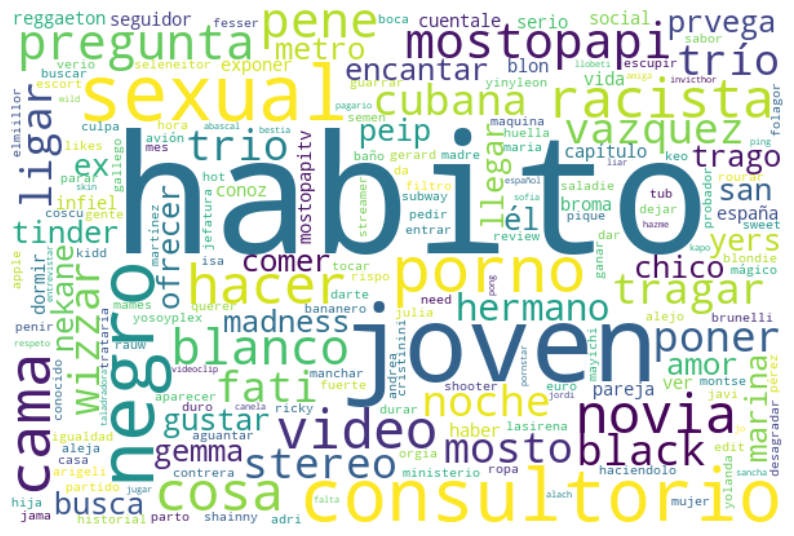

In [9]:

title_words = ' '.join([' '.join(doc) for doc in df['title']])

# Generate the word cloud.
wordcloud = WordCloud(background_color="white",  # Set the background color to white
                      width=600,                # Width of the canvas
                      height=400,               # Height of the canvas
                      collocations=False,       # Avoid duplicate words
                      colormap='viridis'        # Color scheme
                     ).generate(title_words)

# Plot the word cloud.
plt.figure(figsize=(10, 8))      
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Save the visualization to a file.
plt.savefig("title_wordcloud.png")

plt.show()


In [10]:
# Description
# Word frequency analysis
description_tokens = [token for description in df['description'] for token in description]

# Count the occurrences of each token
word_freq = Counter(description_tokens)

# Display the 15 most common words and their frequencies
most_common_words = word_freq.most_common(15)
print(most_common_words)

# If you prefer the output in a DataFrame
df_word_freq = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
print(df_word_freq)

[('mostopapi', 254), ('red', 174), ('social', 156), ('instagram', 142), ('twitter', 127), ('facebook', 127), ('hurra', 106), ('tocar', 57), ('entrevistar', 42), ('joven', 37), ('habito', 36), ('canal', 20), ('sexual', 20), ('negro', 20), ('pregunta', 17)]
           Word  Frequency
0     mostopapi        254
1           red        174
2        social        156
3     instagram        142
4       twitter        127
5      facebook        127
6         hurra        106
7         tocar         57
8   entrevistar         42
9         joven         37
10       habito         36
11        canal         20
12       sexual         20
13        negro         20
14     pregunta         17


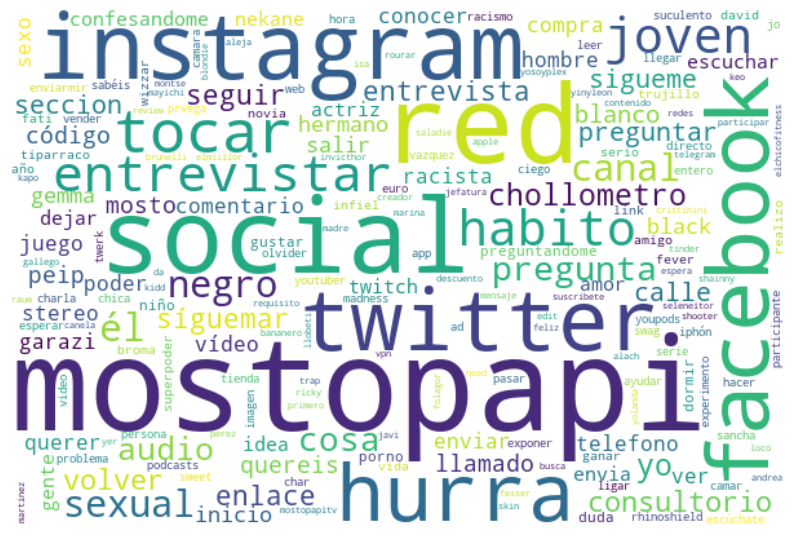

In [11]:

description_words = ' '.join([' '.join(doc) for doc in df['description']])

# Generate the word cloud.
wordcloud = WordCloud(background_color="white",  # Set the background color to white
                      width=600,                # Width of the canvas
                      height=400,               # Height of the canvas
                      collocations=False,       # Avoid duplicate words
                      colormap='viridis'        # Color scheme
                     ).generate(description_words)

# Plot the word cloud.
plt.figure(figsize=(10, 8))      
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Save the visualization to a file.
plt.savefig("description_wordcloud.png")

plt.show()
